<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

COLAB: https://colab.research.google.com/drive/1rKC7pVl3pqx8LOxXzM9QHxglDxVBd8v1?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

Загружаем библиотеки


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Загружаем датасет


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Voolex/ds/main/BIG_HW2/ThoraricSurgery.csv', index_col='id')

Описание признаков:
DGN - диагноз (DGN3, DGN2, DGN4, DGN6, DGN5, DGN8, DGN1). Нужно предсказать

PRE4 - максимальный объём воздуха, который может быть набран в лёгкие после максимально полного выдоха.

PRE5 - Объем выдыхаемого воздуха за 1 секунду

PRE6

PRE7 - боль перед операцией (true, false)

PRE8 - кровохарканье перед операцией (true, false)

PRE9 - отдышка перед операцией (true, false)

PRE10 - кашел перед операцией (true, false)

PRE11 - слабость перед операцией (true, false)

PRE14 - размер исходной опухоли

PRE17 - сахарный диабет (true, false)

PRE19 - 

PRE25 - Периферическая артериальная окклюзионная болезнь (true, false)

PRE30 - Курил ли пациент (true, false)

PRE32 - астма (true, false)

Risk1Yr - выжил ли в течении года после операции (true если умер)

Посмотрим на данные

In [3]:
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F


В датасете всего 470 строк

На первый взгляд все признаки важны для предсказания, выбрасывать ничего не будем

In [4]:
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


Тут мы не получили ничего интересного. Разве что средний возраст всех пациентов - 62 года

Посмотрим, есть ли пропуски в данных

In [5]:
df.isnull().any()

DGN        False
PRE4       False
PRE5       False
PRE6       False
PRE7       False
PRE8       False
PRE9       False
PRE10      False
PRE11      False
PRE14      False
PRE17      False
PRE19      False
PRE25      False
PRE30      False
PRE32      False
AGE        False
Risk1Yr    False
dtype: bool

Пропусков нет. Отлично


Посмотрим на типы данных в датасете

In [6]:
df.dtypes

DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

Много строковых типов. Нужно будет перекодировать в категориальные, но позже. Сначала оценим распределение признаков

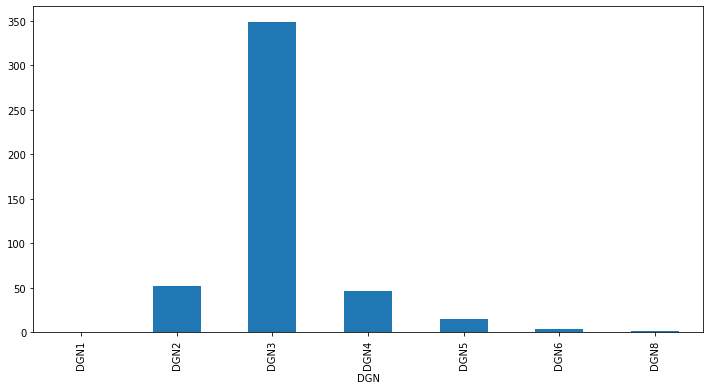

In [7]:
dgn = df.groupby('DGN')['DGN'].count()
dgn.plot.bar(figsize = (12,6))

In [8]:
dgn

DGN
DGN1      1
DGN2     52
DGN3    349
DGN4     47
DGN5     15
DGN6      4
DGN8      2
Name: DGN, dtype: int64

Мы видим, что DGN1,6,8 встречаются очень малое количество раз. Придется удалить строки с этим диагнозом.

In [9]:
df = df.loc[~df['DGN'].isin(['DGN1', 'DGN6', 'DGN8'])]

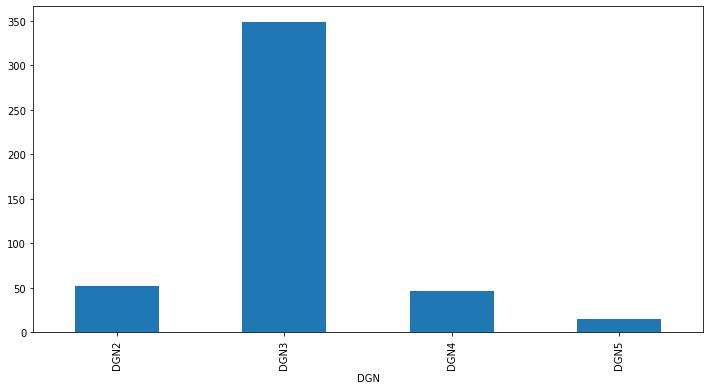

In [10]:
dgn = df.groupby('DGN')['DGN'].count()
dgn.plot.bar(figsize = (12,6))

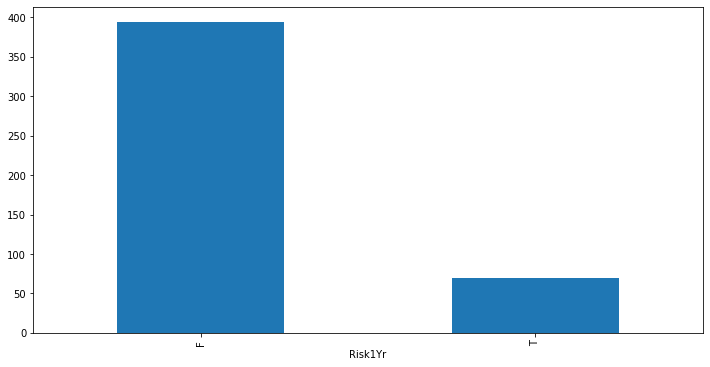

In [11]:
df.groupby('Risk1Yr')['Risk1Yr'].count().plot.bar(figsize = (12,6))

Большинство ребят выжило после операции

Закодируем категориальные признаки

In [12]:
from sklearn import preprocessing

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

In [13]:
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,,
1,0,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
2,1,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
3,1,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
4,1,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
5,1,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


In [14]:
encoders

{'DGN': LabelEncoder(),
 'PRE10': LabelEncoder(),
 'PRE11': LabelEncoder(),
 'PRE14': LabelEncoder(),
 'PRE17': LabelEncoder(),
 'PRE19': LabelEncoder(),
 'PRE25': LabelEncoder(),
 'PRE30': LabelEncoder(),
 'PRE32': LabelEncoder(),
 'PRE6': LabelEncoder(),
 'PRE7': LabelEncoder(),
 'PRE8': LabelEncoder(),
 'PRE9': LabelEncoder(),
 'Risk1Yr': LabelEncoder()}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f790ca012b0>,
      dtype=object)

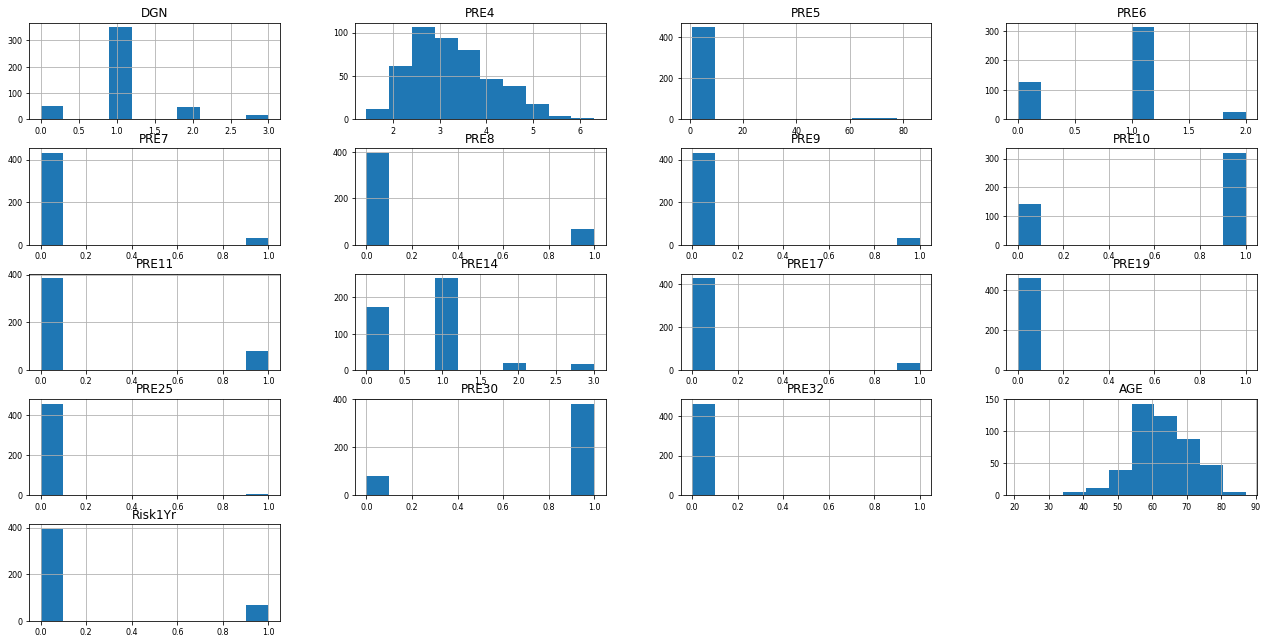

In [15]:
encoded_data.hist(figsize=(22,11), xlabelsize = 8, ylabelsize = 8)

Видим какую-то ошибку в данных PRE5. Если не ошибаюсь, это значение равное количеству выдыхаемого воздуха за 1 секунду. Максимальный объем воздуха может достигать до 6.2л у пловцов. Следовательно, значения больше 6.2 ошибочны и их необходимо удалить

In [16]:
encoded_data = encoded_data.loc[df['PRE5'] < 6.2]

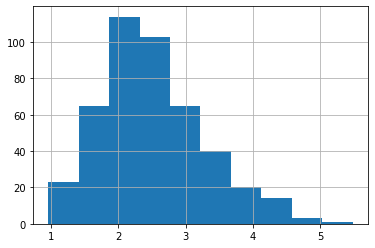

In [17]:
encoded_data.PRE5.hist()

Выделим DGN в отдельную переменную

In [18]:
y = encoded_data.DGN.values
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1,

In [19]:
encoded_data.drop('DGN', axis = 1, inplace = True)
encoded_data

,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,,
1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
3,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
4,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
5,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
467,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
468,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0


Построим матрицу корреляций


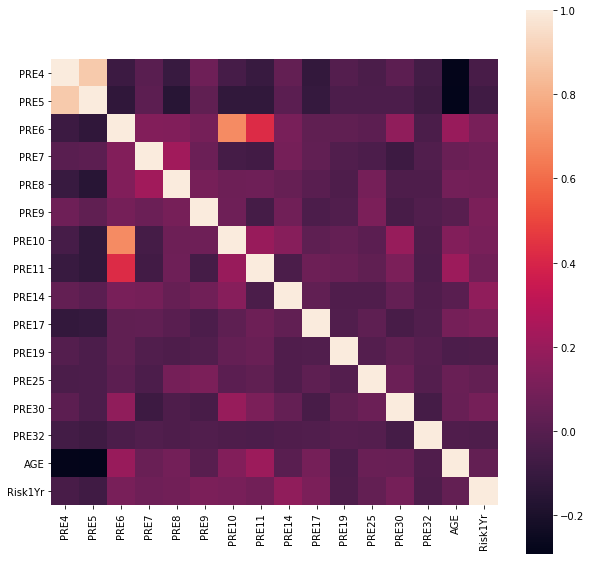

In [20]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

Видим, что PRE4 и PRE5 достаточно сильно коррелируют. Удалим PRE5 из выборки

In [21]:
encoded_data.drop('PRE5', axis = 1, inplace = True)
encoded_data

,PRE4,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
id,,,,,,,,,,,,,,,
1,2.88,1,0,0,0,1,1,3,0,0,0,1,0,60,0
2,3.40,0,0,0,0,0,0,1,0,0,0,1,0,51,0
3,2.76,1,0,0,0,1,0,0,0,0,0,1,0,59,0
4,3.68,0,0,0,0,0,0,0,0,0,0,0,0,54,0
5,2.44,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,3.88,1,0,0,0,1,0,2,0,0,0,1,0,63,0
467,3.76,0,0,0,0,0,0,0,0,0,0,1,0,61,0
468,3.04,1,0,0,0,1,0,2,0,0,0,0,0,52,0


Поместим данные в переменную X и нормализуем

In [22]:
X = np.array(encoded_data.values)
X

array([[ 2.88,  1.  ,  0.  , ...,  0.  , 60.  ,  0.  ],
       [ 3.4 ,  0.  ,  0.  , ...,  0.  , 51.  ,  0.  ],
       [ 2.76,  1.  ,  0.  , ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 3.04,  1.  ,  0.  , ...,  0.  , 52.  ,  0.  ],
       [ 1.96,  1.  ,  0.  , ...,  0.  , 79.  ,  0.  ],
       [ 4.72,  0.  ,  0.  , ...,  0.  , 51.  ,  0.  ]])

In [23]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)
X_scaled

array([[-0.45367477,  0.38529241, -0.25324497, ..., -0.06696495,
        -0.30903351, -0.42302171],
       [ 0.14788522, -1.51153178, -0.25324497, ..., -0.06696495,
        -1.34998849, -0.42302171],
       [-0.59249631,  0.38529241, -0.25324497, ..., -0.06696495,
        -0.42469517, -0.42302171],
       ...,
       [-0.26857939,  0.38529241, -0.25324497, ..., -0.06696495,
        -1.23432682, -0.42302171],
       [-1.51797322,  0.38529241, -0.25324497, ..., -0.06696495,
         1.88853811, -0.42302171],
       [ 1.67492212, -1.51153178, -0.25324497, ..., -0.06696495,
        -1.34998849, -0.42302171]])

Разделим данные на обучающую и тестовую выборки

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.18, random_state=1)

Попробуем модель KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,

In [26]:
# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='cross_val, accuracy'):
    # определили размер графика
    plt.figure(figsize=(12, 6))
    # добавили сетку на фон
    plt.grid(True)
    # построили по х - число соседей, по y - точность
    plt.plot(x, y, 'go-')
    # добавили подписи осей и название графика
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

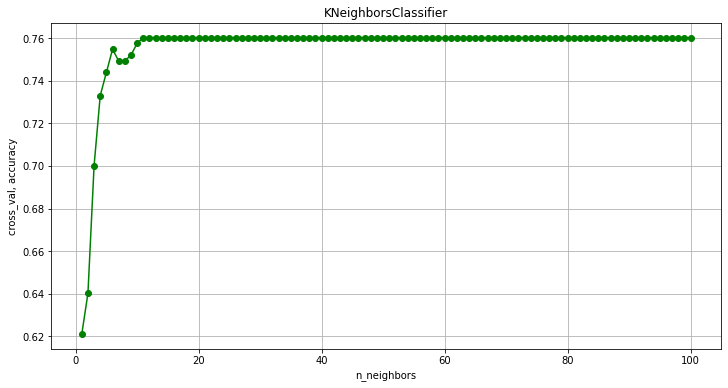

In [27]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [28]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 11} 0.7602369492780452


In [29]:
knn = KNeighborsClassifier(gs.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [30]:
preds = knn.predict(X_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.98      0.86        62
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.75        81
   macro avg       0.19      0.25      0.21        81
weighted avg       0.58      0.75      0.66        81



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результат печальный

Попробуем применить аугментацию


In [32]:
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
aug = ADASYN(random_state=1)
X_train_aug, y_train_aug = aug.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=5)
gs.fit(X_train_aug, y_train_aug)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,

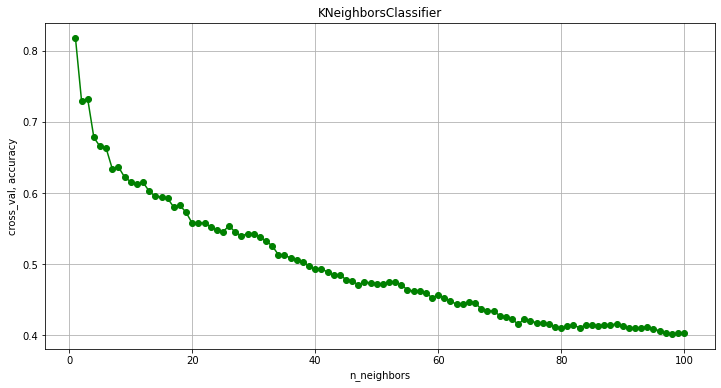

In [35]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [36]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 1} 0.818304851937139


In [37]:
knn = KNeighborsClassifier(gs.best_params_['n_neighbors'])
knn.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
preds = knn.predict(X_test)
preds

array([1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 1, 1, 3, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1])

In [39]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.36      0.42      0.38        12
           1       0.85      0.71      0.77        62
           2       0.00      0.00      0.00         4
           3       0.25      0.33      0.29         3

    accuracy                           0.62        81
   macro avg       0.36      0.36      0.36        81
weighted avg       0.71      0.62      0.66        81



Результат стал немного лучше. Хотя бы стали определяться другие классы. Попробуем логистическую регрессию сразу на аугментированных данных

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
grid = {
    "C":list(np.linspace(0.01,2.0,200, dtype='float')), 
    "penalty":["l1","l2"], 
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
}
rs = RandomizedSearchCV(log, grid, cv=5)
rs.fit(X_train_aug, y_train_aug)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C':...
                                              0.09999999999999999, 0.11, 0.12,
                                              0.13, 0.14, 0.15000000000000002,
                                              0.16, 0.17, 0.180000000000000

In [41]:
rs.best_params_

{'C': 0.73, 'penalty': 'l1', 'solver': 'liblinear'}

In [42]:
log = LogisticRegression(C = rs.best_params_['C'], penalty = rs.best_params_['penalty'], solver = rs.best_params_['solver'])
log.fit(X_train_aug, y_train_aug)
preds = log.predict(X_test)
preds

array([0, 2, 1, 2, 3, 2, 0, 0, 0, 3, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2, 0, 0,
       1, 0, 1, 2, 3, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 1, 3, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 1, 1, 2, 2, 3, 0, 3, 0, 3, 0,
       0, 2, 1, 0, 0, 1, 2, 3, 3, 1, 2, 1, 0, 2, 0])

In [43]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.18      0.42      0.25        12
           1       0.75      0.24      0.37        62
           2       0.00      0.00      0.00         4
           3       0.17      0.67      0.27         3

    accuracy                           0.27        81
   macro avg       0.27      0.33      0.22        81
weighted avg       0.61      0.27      0.33        81



Далее попробуем SVM

In [44]:
from sklearn.svm import SVC
grid = {
    "C":list(np.linspace(0.01,2.0,200, dtype='float')),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
rs = RandomizedSearchCV(SVC(), grid, cv=5)
rs.fit(X_train_aug, y_train_aug)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.02, 0...
                                              0.06999999999999999, 0.08, 0.09,
                                              0.09999999999999999, 0.11, 0.12,
                                              0.13, 0.14, 0.15000000000000002,
                                              0.16, 0.17, 0.18000000000000002,
                                              0.19, 0.2, 0.21000000000000002,
       

In [45]:
rs.best_params_

{'C': 0.98, 'kernel': 'poly'}

In [46]:
svc = SVC(C = rs.best_params_['C'], kernel= rs.best_params_['kernel'])
svc.fit(X_train_aug, y_train_aug)
preds = svc.predict(X_test)
preds

array([0, 2, 0, 0, 2, 2, 1, 0, 0, 3, 0, 0, 1, 3, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 0, 2, 1, 3, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 3, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 1, 3, 2, 0, 1, 2, 1, 1, 0, 1, 3, 0, 1, 2, 0, 2,
       0, 0, 2, 0, 3, 2, 3, 3, 3, 1, 1, 2, 0, 2, 2])

In [47]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.23      0.42      0.29        12
           1       1.00      0.27      0.43        62
           2       0.10      0.75      0.18         4
           3       0.08      0.33      0.13         3

    accuracy                           0.32        81
   macro avg       0.35      0.44      0.26        81
weighted avg       0.81      0.32      0.39        81



SVM смогла лучше всех предсказать результат, и единственная из всех моделей смогла распознать все 4 класса
